In [67]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [68]:
df = pd.read_csv("cc-est2019-alldata.csv", encoding="cp1252")

In [69]:
df=df.drop(df.columns[20:34], axis=1)
df=df.drop(df.columns[22:42],axis=1)
df=df.drop(df.columns[24:],axis=1)
df = df[df.YEAR == 12]
df=df[df.AGEGRP == 0]
df=df[df.STNAME!="Alaska"]
df=df[df.STNAME!="Hawaii"]
df=df.drop(["NA_MALE"],axis=1)
df=df.drop(["NA_FEMALE"],axis=1)
df=df.drop(["WA_MALE"],axis=1)
df=df.drop(["WA_FEMALE"],axis=1)


In [70]:
df2=pd.read_csv("Unemployment_Change.csv")

In [6]:
df.head()

,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,BA_MALE,BA_FEMALE,IA_MALE,IA_FEMALE,AA_MALE,AA_FEMALE,NHWA_MALE,NHWA_FEMALE,H_MALE,H_FEMALE
209,50,1,1,Alabama,Autauga County,12,0,55869,27092,28777,5237,6000,121,145,286,370,20138,21077,884,787
437,50,1,3,Alabama,Baldwin County,12,0,223234,108247,114987,9486,10107,903,839,932,1448,89845,95902,5545,4989
665,50,1,5,Alabama,Barbour County,12,0,24686,13064,11622,6311,5595,103,67,55,61,5894,5341,629,488
893,50,1,7,Alabama,Bibb County,12,0,22394,11929,10465,2941,1822,53,50,23,25,8482,8181,343,280
1121,50,1,9,Alabama,Blount County,12,0,57826,28472,29354,516,462,192,178,85,100,24494,25682,2950,2632


In [71]:
W=[]
M=[]
U=[]
for i in range(3108):
    total_pop=df.iloc[i,7]
    women_pop=df.iloc[i,9]
    women_percent=((women_pop)/(total_pop))*100
    W.append(women_percent)
    
    men_pop=df.iloc[i,8]
    men_percent=((men_pop)/(total_pop))*100
    M.append(men_percent)

for i in range(3108):
    U.append(df2.iloc[i,1])

df["% Women"]=W
df["% Men"]=M
df["Unemployment Change"]=U


In [72]:
df.head()

,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,...,IA_FEMALE,AA_MALE,AA_FEMALE,NHWA_MALE,NHWA_FEMALE,H_MALE,H_FEMALE,% Women,% Men,Unemployment Change
209,50,1,1,Alabama,Autauga County,12,0,55869,27092,28777,...,145,286,370,20138,21077,884,787,51.507992,48.492008,9.1
437,50,1,3,Alabama,Baldwin County,12,0,223234,108247,114987,...,839,932,1448,89845,95902,5545,4989,51.509627,48.490373,12.9
665,50,1,5,Alabama,Barbour County,12,0,24686,13064,11622,...,67,55,61,5894,5341,629,488,47.079316,52.920684,6.6
893,50,1,7,Alabama,Bibb County,12,0,22394,11929,10465,...,50,23,25,8482,8181,343,280,46.731267,53.268733,14.8
1121,50,1,9,Alabama,Blount County,12,0,57826,28472,29354,...,178,85,100,24494,25682,2950,2632,50.762633,49.237367,7.1


In [140]:
X=df.values
df3=df
for i in range(20):
    df3=df3.drop(df.columns[i],axis=1)
Y=df3.values

In [136]:
X[3109]

array(['100', '100', '100', 'Adjustor2', 'Adjustor2', '100', '100', '100',
       '100', '100', '100', '100', '100', '100', '100', '100', '100',
       '100', '100', '100', '100', '100', '0'], dtype=object)

Automatically created module for IPython interactive environment
[[50.40782711 49.59217289 13.52333614]
 [49.61488906 50.38511094  5.89104633]]


/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


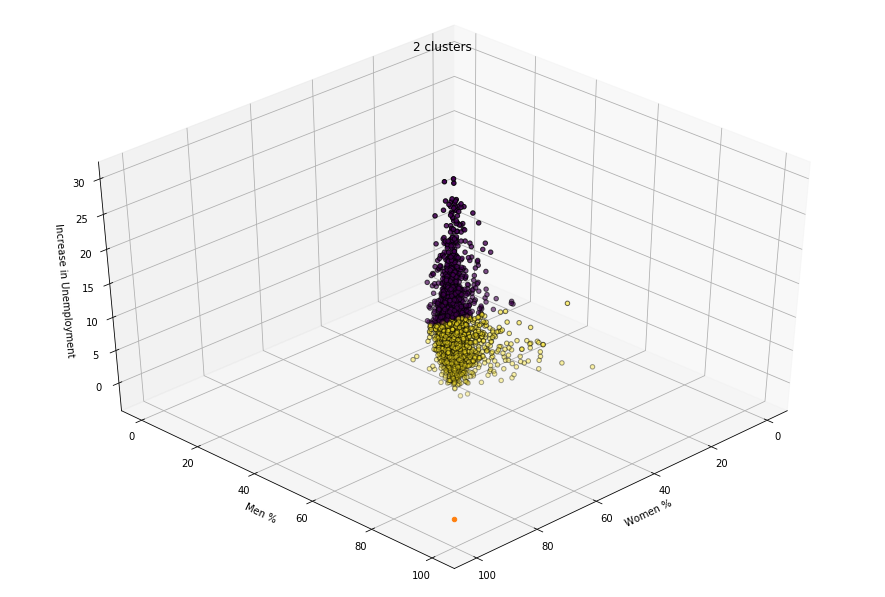

In [143]:
print(__doc__)


# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

estimators = [
              ('k_means_iris_3', KMeans(n_clusters=2)),
              ]

fignum = 1
titles = ['2 clusters']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(12, 8))
    ax = Axes3D(fig, rect=[1, 1, 1, 1], elev=40, azim=45)
    est.fit(Y)
    labels = est.labels_

    ax.scatter(X[:, 20], X[:, 21], X[:, 22]
                ,c=labels.astype(np.float), edgecolor='k')
    ax.scatter(0,0,0,c=)
    ax.scatter(100,100,0)

    #ax.w_xaxis.set_ticklabels([])
    #ax.w_yaxis.set_ticklabels([])
    #ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Women %')
    ax.set_zlabel('Increase in Unemployment')
    ax.set_ylabel('Men %')
    ax.set_title(titles[fignum - 1])
    #ax.dist = 12
    fignum = fignum + 1

    print(est.cluster_centers_)

fig.show()